In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv(r"D:\Machine Learning\Supervised Machine Learning\classification\Logistic Algorithm\Social_ads\social_ads.csv")
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [3]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

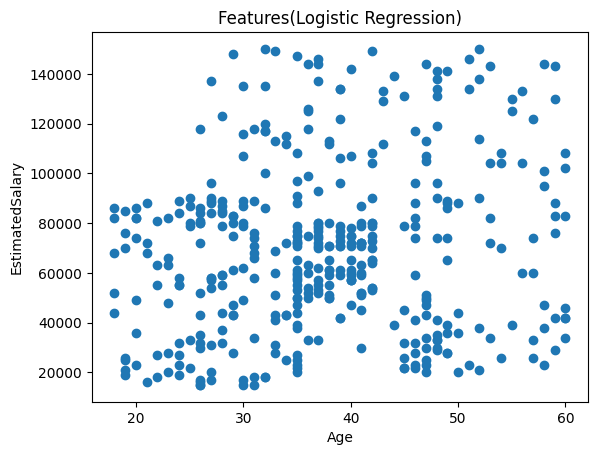

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['EstimatedSalary'], marker='o')
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("Features(Logistic Regression)")
plt.show()



In [8]:
df.shape

(400, 3)

In [9]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'EstimatedSalary']]
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=35)

In [10]:
X_test

,Age,EstimatedSalary
69,31,68000
215,60,108000
92,26,15000
316,54,104000
353,37,57000
...,...,...
225,37,53000
101,28,59000
233,49,86000
194,28,89000


In [11]:
y_test

69     0
215    1
92     0
316    1
353    0
      ..
225    0
101    0
233    1
194    0
82     0
Name: Purchased, Length: 80, dtype: int64

In [12]:
X_train

,Age,EstimatedSalary
395,46,41000
67,23,82000
234,38,112000
86,24,55000
269,40,61000
...,...,...
232,40,107000
249,35,97000
33,28,44000
271,59,76000


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [16]:
model.score(X_test, y_test)

0.875

In [17]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)


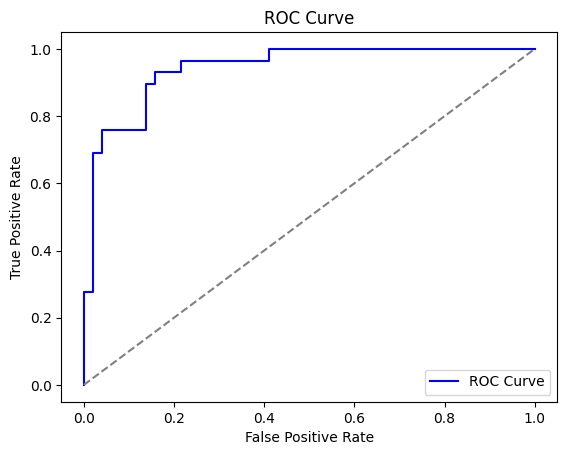

In [18]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.9432048681541582
